# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
print(cities)
# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

['ushuaia', 'invercargill', 'longyearbyen', 'puerto natales', 'weno', 'pisco', 'whitehorse', 'isafjordur', 'tannum sands', 'albany', 'yellowknife', 'kiel', 'nemuro', 'port-aux-francais', 'nidau', 'uturoa', 'waitangi', 'al badari', 'mao', 'tazovsky', 'richards bay', 'jamestown', 'bethel', 'basotu', 'havre', 'caister-on-sea', 'camargo', 'tromso', 'dunningen', 'petropavlovsk-kamchatsky', 'port hueneme', 'west island', "st. john's", 'thompson', 'adamstown', 'fuvahmulah', 'sassandra', 'grytviken', 'hermanus', 'college', 'toga village', 'lebu', 'kolokani', 'anadyr', 'phan rang-thap cham', 'edinburgh of the seven seas', 'utrik', 'papatowai', 'blackmans bay', 'baluntaicun', 'kyain seikgyi township', 'pankrushikha', 'ribeira grande', 'stanley', 'kabansk', 'broome', 'tiksi', 'dudinka', 'bikenibeu village', 'naranjo', 'vila franca do campo', 'sarina', 'hadibu', 'san antonio de pale', 'vorgashor', 'ouellah', 'hammerfest', 'castillos', 'hawaiian paradise park', 'santa elena de uairen', 'envira', 'r

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = url + f"q={city}&appid={weather_api_key}"

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response=requests.get(city_url)
        data=response.json()
        # Parse the JSON and retrieve data
        city_weather = data["weather"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = data["coord"]["lat"]
        city_lng = data["coord"]["lon"]
        city_max_temp = data["main"]["temp_max"]
        city_humidity = data["main"]["humidity"]
        city_clouds = data["clouds"]["all"]
        city_wind = data["wind"]["speed"]
        city_country = data["sys"]["country"]
        city_date = data["sys"]["id"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 2 of Set 1 | invercargill
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | puerto natales
City not found. Skipping...
Processing Record 5 of Set 1 | weno
Processing Record 6 of Set 1 | pisco
Processing Record 7 of Set 1 | whitehorse
Processing Record 8 of Set 1 | isafjordur
City not found. Skipping...
Processing Record 9 of Set 1 | tannum sands
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | kiel
Processing Record 13 of Set 1 | nemuro
City not found. Skipping...
Processing Record 14 of Set 1 | port-aux-francais
City not found. Skipping...
Processing Record 15 of Set 1 | nidau
Processing Record 16 of Set 1 | uturoa
City not found. Skipping...
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | al badari
City not found. Skipping...
P

Processing Record 40 of Set 3 | nadym
City not found. Skipping...
Processing Record 41 of Set 3 | udachny
Processing Record 42 of Set 3 | kyren
City not found. Skipping...
Processing Record 43 of Set 3 | punta arenas
City not found. Skipping...
Processing Record 44 of Set 3 | magistral'nyy
City not found. Skipping...
Processing Record 45 of Set 3 | chornomors'k
City not found. Skipping...
Processing Record 46 of Set 3 | dunedin
Processing Record 47 of Set 3 | isle of lewis
City not found. Skipping...
Processing Record 48 of Set 3 | inhambane
City not found. Skipping...
Processing Record 49 of Set 3 | weyburn
City not found. Skipping...
Processing Record 0 of Set 4 | sidi akkacha
City not found. Skipping...
Processing Record 1 of Set 4 | san juan de miraflores
Processing Record 2 of Set 4 | port elizabeth
Processing Record 3 of Set 4 | extrema
City not found. Skipping...
Processing Record 4 of Set 4 | alotau
City not found. Skipping...
Processing Record 5 of Set 4 | margaret river
City 

City not found. Skipping...
Processing Record 31 of Set 6 | chonchi
Processing Record 32 of Set 6 | kirensk
City not found. Skipping...
Processing Record 33 of Set 6 | nar'yan-mar
City not found. Skipping...
Processing Record 34 of Set 6 | faya-largeau
City not found. Skipping...
Processing Record 35 of Set 6 | buka
City not found. Skipping...
Processing Record 36 of Set 6 | wenchang
City not found. Skipping...
Processing Record 37 of Set 6 | dalandzadgad
City not found. Skipping...
Processing Record 38 of Set 6 | beltangadi
City not found. Skipping...
Processing Record 39 of Set 6 | port saint john's
City not found. Skipping...
Processing Record 40 of Set 6 | orbetello
City not found. Skipping...
Processing Record 41 of Set 6 | zambezi
City not found. Skipping...
Processing Record 42 of Set 6 | khairpur nathan shah
City not found. Skipping...
Processing Record 43 of Set 6 | bonthe
City not found. Skipping...
Processing Record 44 of Set 6 | qujing
City not found. Skipping...
Processing

City not found. Skipping...
Processing Record 15 of Set 9 | deder
City not found. Skipping...
Processing Record 16 of Set 9 | alpine
Processing Record 17 of Set 9 | mahdia
Processing Record 18 of Set 9 | sitka
Processing Record 19 of Set 9 | bossangoa
City not found. Skipping...
Processing Record 20 of Set 9 | antsiranana
City not found. Skipping...
Processing Record 21 of Set 9 | anabar
City not found. Skipping...
Processing Record 22 of Set 9 | tralee
City not found. Skipping...
Processing Record 23 of Set 9 | maksatikha
City not found. Skipping...
Processing Record 24 of Set 9 | gualeguay
City not found. Skipping...
Processing Record 25 of Set 9 | saint-philippe
Processing Record 26 of Set 9 | tofol
Processing Record 27 of Set 9 | orkney
City not found. Skipping...
Processing Record 28 of Set 9 | fountain hills
Processing Record 29 of Set 9 | chipinge
City not found. Skipping...
Processing Record 30 of Set 9 | amga
City not found. Skipping...
Processing Record 31 of Set 9 | nayoro
C

City not found. Skipping...
Processing Record 47 of Set 11 | acarau
City not found. Skipping...
Processing Record 48 of Set 11 | coxen hole
Processing Record 49 of Set 11 | vuktyl
City not found. Skipping...
Processing Record 0 of Set 12 | ares
City not found. Skipping...
Processing Record 1 of Set 12 | tynda
City not found. Skipping...
Processing Record 2 of Set 12 | braniewo
City not found. Skipping...
Processing Record 3 of Set 12 | vysokiy
City not found. Skipping...
Processing Record 4 of Set 12 | mantua
Processing Record 5 of Set 12 | kill devil hills
Processing Record 6 of Set 12 | biloela
City not found. Skipping...
Processing Record 7 of Set 12 | calvinia
City not found. Skipping...
Processing Record 8 of Set 12 | ambalavao
City not found. Skipping...
Processing Record 9 of Set 12 | linares
City not found. Skipping...
Processing Record 10 of Set 12 | alaghsas
City not found. Skipping...
Processing Record 11 of Set 12 | espargos
City not found. Skipping...
Processing Record 12 

In [6]:
print(data)

{'coord': {'lon': -65.3282, 'lat': -28.9193}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 291.41, 'feels_like': 290.15, 'temp_min': 291.41, 'temp_max': 291.41, 'pressure': 1011, 'humidity': 33, 'sea_level': 1011, 'grnd_level': 970}, 'visibility': 10000, 'wind': {'speed': 3.99, 'deg': 3, 'gust': 9.08}, 'clouds': {'all': 1}, 'dt': 1692065463, 'sys': {'country': 'AR', 'sunrise': 1692010489, 'sunset': 1692050249}, 'timezone': -10800, 'id': 3853935, 'name': 'Icaño', 'cod': 200}


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          209
Lat           209
Lng           209
Max Temp      209
Humidity      209
Cloudiness    209
Wind Speed    209
Country       209
Date          209
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,283.16,64,71,1.79,NZ,2008959
1,longyearbyen,78.2186,15.6401,283.06,76,75,3.60,SJ,1663
2,weno,7.4515,151.8468,304.12,74,75,4.12,FM,7898
3,pisco,-13.7000,-76.2167,292.18,82,0,5.14,PE,8691
4,whitehorse,60.7161,-135.0538,287.49,49,100,5.36,CA,47668


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,283.16,64,71,1.79,NZ,2008959
1,longyearbyen,78.2186,15.6401,283.06,76,75,3.60,SJ,1663
2,weno,7.4515,151.8468,304.12,74,75,4.12,FM,7898
3,pisco,-13.7000,-76.2167,292.18,82,0,5.14,PE,8691
4,whitehorse,60.7161,-135.0538,287.49,49,100,5.36,CA,47668


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

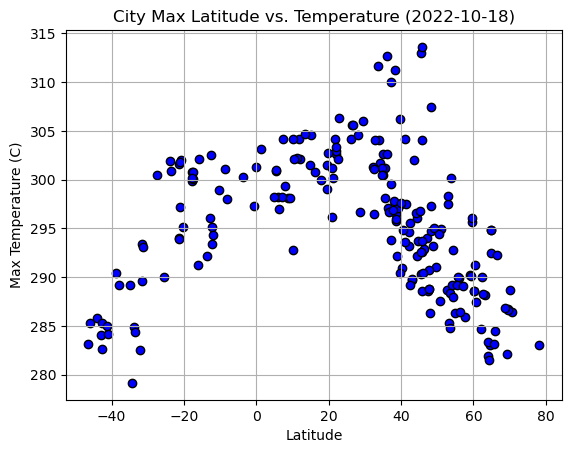

In [11]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]
plt.scatter(lat, temp, marker="o", color="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

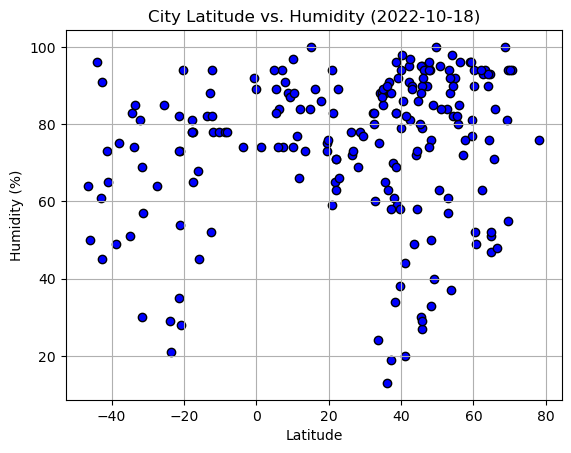

In [25]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df["Lat"]
humid = city_data_df["Humidity"]
plt.scatter(lat, humid, marker="o", color="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

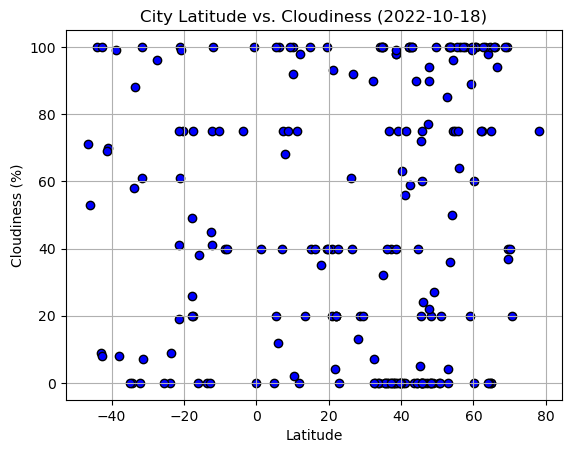

In [24]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df["Lat"]
cloud = city_data_df["Cloudiness"]
plt.scatter(lat, cloud, marker="o", color="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

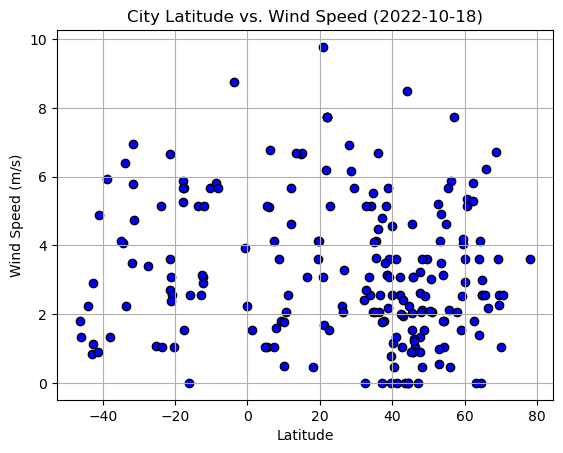

In [26]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df["Lat"]
wind_spd = city_data_df["Wind Speed"]
plt.scatter(lat, wind_spd, marker="o", color="blue", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_data, y_data, x_label, y_label, title):
    plt.scatter(x_data, y_data, marker="o", color="blue", edgecolors="black")

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,longyearbyen,78.2186,15.6401,283.06,76,75,3.60,SJ,1663
2,weno,7.4515,151.8468,304.12,74,75,4.12,FM,7898
4,whitehorse,60.7161,-135.0538,287.49,49,100,5.36,CA,47668
6,albany,42.6001,-73.9662,295.54,81,100,1.05,US,19530
7,yellowknife,62.4560,-114.3525,290.05,63,75,5.81,CA,2041581


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,283.16,64,71,1.79,NZ,2008959
3,pisco,-13.7000,-76.2167,292.18,82,0,5.14,PE,8691
5,tannum sands,-23.9504,151.3693,301.90,29,0,5.14,AU,9526
10,waitangi,-43.9535,-176.5597,285.83,96,100,2.24,NZ,2040615
20,west island,-12.1568,96.8225,295.14,94,75,3.09,CC,9570


###  Temperature vs. Latitude Linear Regression Plot

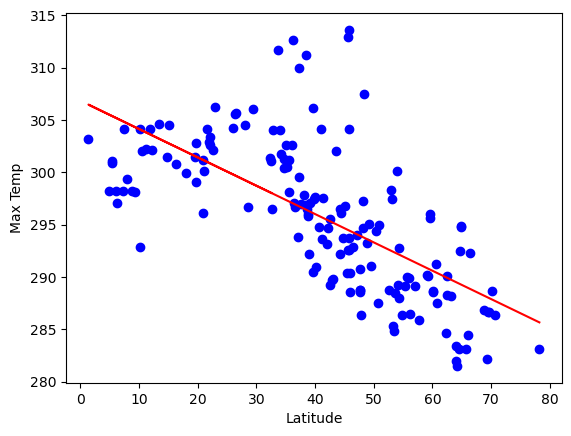

r-squared value: 0.45013019254441067


In [18]:
# Linear regression on Northern Hemisphere

x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Max Temp"]
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
regress_values = intercept + slope * x_data
plt.scatter(x_data, y_data, marker="o", color="blue")
plt.plot(x_data, regress_values, "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

print("r-squared value:", r_value ** 2)

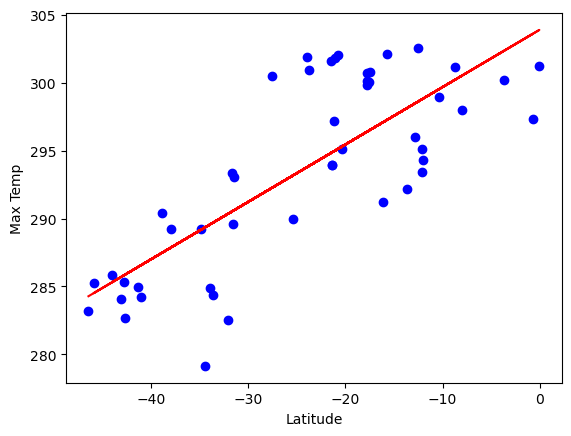

r-value is: 0.5940726606895421


In [19]:
# Linear regression on Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Max Temp"]
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
regress_values = intercept + slope * x_data
plt.scatter(x_data, y_data, marker="o", color="blue")
plt.plot(x_data, regress_values, "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

print("r-value is:", r_value ** 2)

**Discussion about the linear relationship:** The linear relationship of the northern and southern hemispheres are opposite:  the northern is positive and the southern is negative.  The closer to the equator (northern hemisphere), the higher the temp and the further from the equator (southern hemisphere) the lower the temp.

### Humidity vs. Latitude Linear Regression Plot

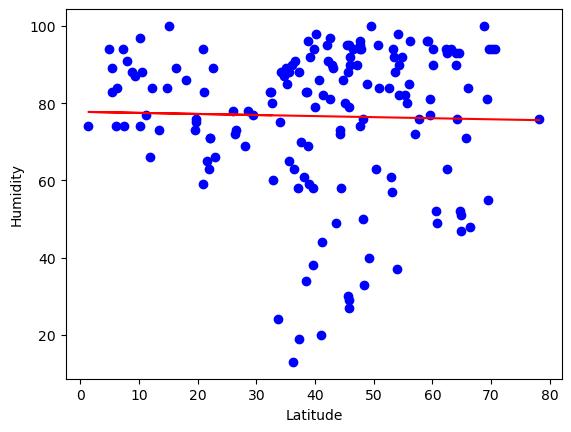

r-squared value: 0.0006549107388341125


In [20]:
# Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Humidity"]
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
regress_values = intercept + slope * x_data
plt.scatter(x_data, y_data, marker="o", color="blue")
plt.plot(x_data, regress_values, "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

print("r-squared value:", r_value ** 2)

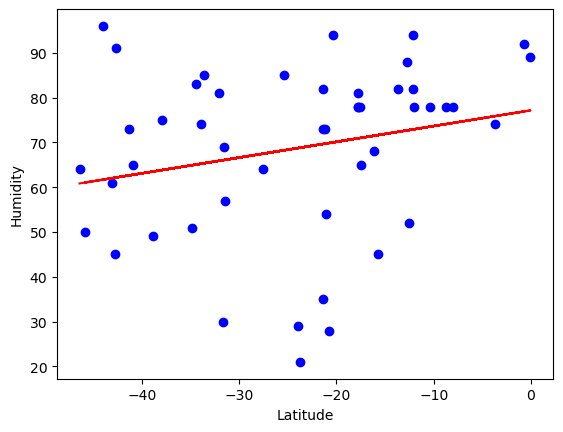

r-value is: 0.053638185593346197


In [21]:
# Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Humidity"]
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
regress_values = intercept + slope * x_data
plt.scatter(x_data, y_data, marker="o", color="blue")
plt.plot(x_data, regress_values, "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

print("r-value is:", r_value ** 2)

**Discussion about the linear relationship:** The humidity levels in the northern and southern hemispheres are unaffected by latitude and are very similar.

### Cloudiness vs. Latitude Linear Regression Plot

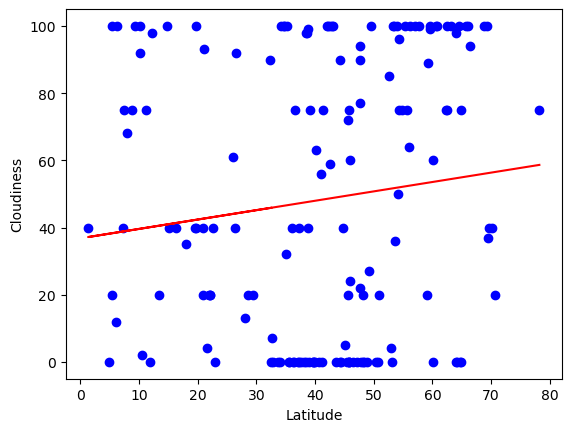

r-squared value: 0.014597868687959889


In [22]:
# Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Cloudiness"]
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
regress_values = intercept + slope * x_data
plt.scatter(x_data, y_data, marker="o", color="blue")
plt.plot(x_data, regress_values, "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

print("r-squared value:", r_value ** 2)

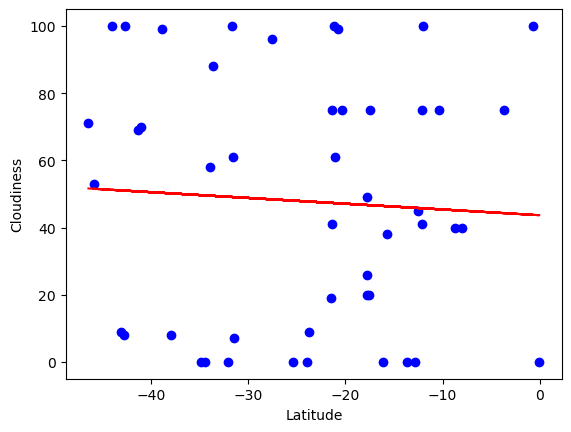

r-value is: 0.003476601795211283


In [23]:
# Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Cloudiness"]
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
regress_values = intercept + slope * x_data
plt.scatter(x_data, y_data, marker="o", color="blue")
plt.plot(x_data, regress_values, "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

print("r-value is:", r_value ** 2)

**Discussion about the linear relationship:** The observation of clouds in the northern versus southern hemisphere has an inverse relationship with latitude.  There are more observations of clouds in the northern hemisphere than in the southern hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

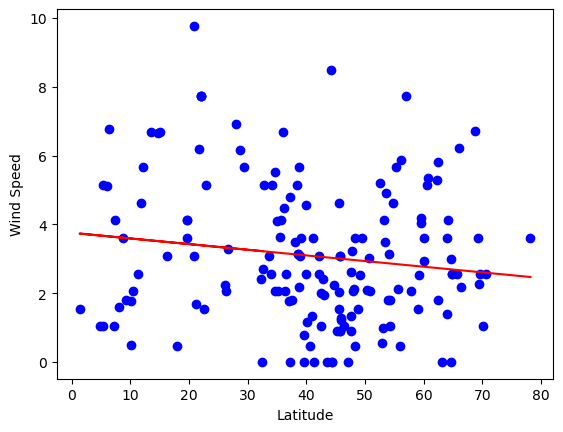

r-squared value: 0.02006976948670818


In [27]:
# Northern Hemisphere
x_data = northern_hemi_df["Lat"]
y_data = northern_hemi_df["Wind Speed"]
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
regress_values = intercept + slope * x_data
plt.scatter(x_data, y_data, marker="o", color="blue")
plt.plot(x_data, regress_values, "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

print("r-squared value:", r_value ** 2)

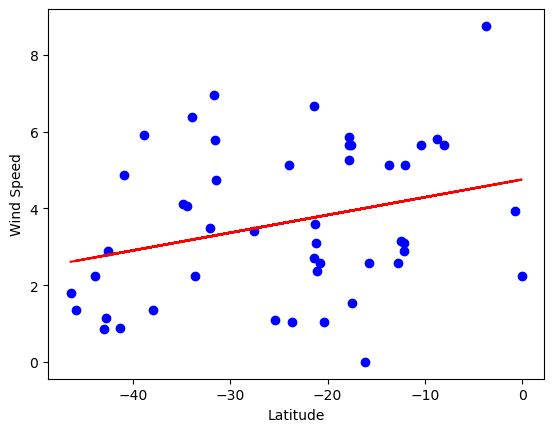

r-value is: 0.08426848038901023


In [28]:
# Southern Hemisphere
x_data = southern_hemi_df["Lat"]
y_data = southern_hemi_df["Wind Speed"]
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
regress_values = intercept + slope * x_data
plt.scatter(x_data, y_data, marker="o", color="blue")
plt.plot(x_data, regress_values, "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

print("r-value is:", r_value ** 2)

**Discussion about the linear relationship:** Wind speed in the northern hemisphere has a positive correlation with latitude and the southern hemisphere a negative correlation.